In [3]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import fetch_20newsgroups

In [10]:
comp_categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware']
rec_categories = ['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
comp_train = fetch_20newsgroups(subset='train', categories=comp_categories, shuffle=True, random_state=42)
rec_train = fetch_20newsgroups(subset='train', categories=rec_categories, shuffle=True, random_state=42)

In [137]:
print("%d documents" % len(comp_train.filenames))
print("%d categories" % len(comp_train.target_names))

print("%d documents" % len(rec_train.filenames))
print("%d categories" % len(rec_train.target_names))

2343 documents
4 categories
2389 documents
4 categories


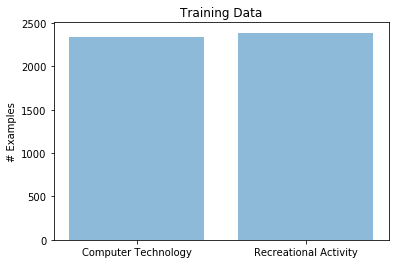

In [39]:
# a)
plt.bar(np.arange(2), [len(comp_train.filenames), len(rec_train.filenames)], align='center', alpha=0.5)
plt.xticks(np.arange(2), ('Computer Technology', 'Recreational Activity'))
plt.ylabel('# Examples')
plt.title('Training Data')
plt.show()

In [65]:
# b) First tokenize each document into words. Then, excluding the stop words,
# punctuations, and using stemmed version of words, create a TFxIDF vector representations
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer # what kind of stemming algorithm to use?

import re

class MyTokenizer(object):
    def __init__(self):
        self.stemmer =nPorterStemmer()
        self.token_pattern = re.compile(u'(?u)\\b\\w\\w+\\b')
        
    def __call__(self, doc):
        return [self.stemmer.stem(w) for w in self.token_pattern.findall(doc)]

myVectorizer_df2 = CountVectorizer(min_df=2, stop_words=text.ENGLISH_STOP_WORDS, tokenizer=MyTokenizer()) 
myVectorizer_df5 = CountVectorizer(min_df=5, stop_words=text.ENGLISH_STOP_WORDS, tokenizer=MyTokenizer()) 

In [209]:
corpus = comp_train.data + rec_train.data
Xdf2 = myVectorizer_df2.fit_transform(corpus)
Xdf5 = myVectorizer_df5.fit_transform(corpus)

tfidf_transformer2, tfidf_transformer5 = TfidfTransformer(), TfidfTransformer()
Xtf2 = tfidf_transformer2.fit_transform(Xdf2)
Xtf5 = tfidf_transformer5.fit_transform(Xdf5)

In [67]:
# myVectorizer.get_feature_names()
print(Xdf2.shape, Xdf5.shape) # 4732 documents and 25305 terms(tokens?)
print(Xtf2.shape, Xtf5.shape)
# Is X my answer?

((4732, 25305), (4732, 10691))
((4732, 25305), (4732, 10691))


In [52]:
# vec=CountVectorizer(min_df=1)
# corpus = [
#     'This is the first document.',
#     'This is the second second document.',
#     'And the third one.',
#     'Is this the first document?',
# ]
# X = vec.fit_transform(corpus)
# vec.get_feature_names()

[u'and',
 u'document',
 u'first',
 u'is',
 u'one',
 u'second',
 u'the',
 u'third',
 u'this']

In [ ]:
# c) TFICF?? 

In [206]:
# d) Latent Semantic Indexing (Analysis)
from sklearn.decomposition import TruncatedSVD
k = 50
svd2, svd5 = TruncatedSVD(n_components=k, random_state=42), TruncatedSVD(n_components=k, random_state=42)
Xtf2_transformed = svd2.fit_transform(Xtf2)
Xtf5_transformed = svd5.fit_transform(Xtf5)
print(Xtf2_transformed.shape, Xtf5_transformed.shape)

# NMF
from sklearn.decomposition import NMF
nmfsvd2, nmfsvd5 = NMF(n_components=50, random_state=42), NMF(n_components=50, random_state=42)
Xtf2_nmftrans = nmfsvd2.fit_transform(Xtf2)
Xtf5_nmftrans = nmfsvd5.fit_transform(Xtf5)
print(Xtf2_nmftrans.shape, Xtf5_nmftrans.shape)

((4732, 50), (4732, 50))
((4732, 50), (4732, 50))


In [211]:
# Compare df 2
import numpy as np
from sklearn.svm import LinearSVC, SVC

ytrain = np.zeros(shape=(4732,))
ytrain[len(comp_train.filenames):] = 1

hardclf = SVC(random_state=42, kernel='linear', C=1000, probability=True)
hardclf.fit(Xtf2_transformed, ytrain)
softclf = SVC(random_state=42, kernel='linear', C=0.001, probability=True)
softclf.fit(Xtf2_transformed, ytrain)

testX = tfidf_transformer2.transform(myVectorizer_df2.transform(comp_test.data + rec_test.data))
testX2_transformed = svd2.transform(testX)
testy = np.zeros(shape=(1560+1590,))
testy[1560:] = 1

ypredhard = hardclf.predict(testX2_transformed)
ypredsoft = softclf.predict(testX2_transformed)
ypredhardProb = hardclf.predict_proba(testX2_transformed)
ypredsoftProb = softclf.predict_proba(testX2_transformed)
# print(ypredhard.shape, ypredsoft.shape)
# print(ypredhardProb.shape, ypredsoftProb.shape)
print("df=2 Hard and Soft")
print(getmetrics(confusion_matrix(testy, ypredhard)))
print(getmetrics(confusion_matrix(testy, ypredsoft)))

df=2 Hard and Soft
(0.97333333333333338, 0.96923076923076923, 0.97674418604651159)
(0.50476190476190474, 0.0, nan)


/Users/Peter/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """


In [212]:
# Vs. df 5
hardclf = SVC(random_state=42, kernel='linear', C=1000, probability=True)
hardclf.fit(Xtf5_transformed, ytrain)
softclf = SVC(random_state=42, kernel='linear', C=0.001, probability=True)
softclf.fit(Xtf5_transformed, ytrain)

testX = tfidf_transformer5.transform(myVectorizer_df5.transform(comp_test.data + rec_test.data))
testX5_transformed = svd5.transform(testX)
testy = np.zeros(shape=(1560+1590,))
testy[1560:] = 1

ypredhard = hardclf.predict(testX5_transformed)
ypredsoft = softclf.predict(testX5_transformed)
ypredhardProb = hardclf.predict_proba(testX5_transformed)
ypredsoftProb = softclf.predict_proba(testX5_transformed)
# print(ypredhard.shape, ypredsoft.shape)
# print(ypredhardProb.shape, ypredsoftProb.shape)
print("df=5 Hard and Soft")
print(getmetrics(confusion_matrix(testy, ypredhard)))
print(getmetrics(confusion_matrix(testy, ypredsoft)))

# Df=2 performs marginally better

df=5 Hard and Soft
(0.97142857142857142, 0.96602564102564104, 0.97603626943005184)
(0.50476190476190474, 0.0, nan)


/Users/Peter/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """


In [165]:
# e) Hard and soft margin SVM
import numpy as np
from sklearn.svm import LinearSVC, SVC
X = Xtf2
y = np.zeros(shape=(4732,))
y[len(comp_train.filenames):] = 1
# 0 for comp class, 1 for rec class

hardclf = SVC(random_state=42, kernel='linear', C=1000, probability=True)
hardclf.fit(X, y)
softclf = SVC(random_state=42, kernel='linear', C=0.001, probability=True)
softclf.fit(X, y)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [78]:
comp_test = fetch_20newsgroups(subset='test', categories=comp_categories, shuffle=True, random_state=42)
rec_test = fetch_20newsgroups(subset='test', categories=rec_categories, shuffle=True, random_state=42)
print("%d documents" % len(comp_test.filenames))
print("%d categories" % len(comp_test.target_names))

print("%d documents" % len(rec_test.filenames))
print("%d categories" % len(rec_test.target_names))

1560 documents
4 categories
1590 documents
4 categories


In [164]:
tfidf_transformer.fit(Xdf2)

# testX = svd.fit_transform(tfidf_transformer.transform(myVectorizer_df2.transform(comp_test.data + rec_test.data)))
testX = tfidf_transformer.transform(myVectorizer_df2.transform(comp_test.data + rec_test.data))
testy = np.zeros(shape=(1560+1590,))
testy[1560:] = 1
print(testX.shape, X.shape)

((3150, 25305), (4732, 50))


In [172]:
ypredhard = hardclf.predict(testX)
ypredsoft = softclf.predict(testX)
ypredhardProb = hardclf.predict_proba(testX)
ypredsoftProb = softclf.predict_proba(testX)
print(ypredhard.shape, ypredsoft.shape)
print(ypredhardProb.shape, ypredsoftProb.shape)

((3150,), (3150,))
((3150, 2), (3150, 2))


In [180]:
print(ypredhardProb, ypredsoftProb)
print(ypredhardProb[:,1])
# print(ypredhard, ypredsoft)

(array([[  9.97788606e-01,   2.21139420e-03],
       [  9.99993000e-01,   6.99957223e-06],
       [  9.99422390e-01,   5.77610328e-04],
       ..., 
       [  1.40934226e-08,   9.99999986e-01],
       [  5.36506145e-06,   9.99994635e-01],
       [  1.68798563e-09,   9.99999998e-01]]), array([[  9.98917306e-01,   1.08269396e-03],
       [  9.99999087e-01,   9.13269527e-07],
       [  9.99998669e-01,   1.33050265e-06],
       ..., 
       [  8.83992011e-02,   9.11600799e-01],
       [  3.55626709e-01,   6.44373291e-01],
       [  1.77628733e-07,   9.99999822e-01]]))
[  2.21139420e-03   6.99957223e-06   5.77610328e-04 ...,   9.99999986e-01
   9.99994635e-01   9.99999998e-01]


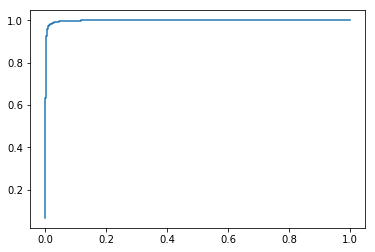

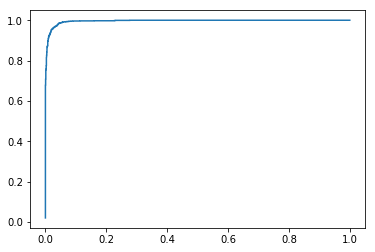

In [182]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_true=testy, y_score=ypredhardProb[:,1], pos_label=1.) # need prob scores for y_scores
plt.plot(fpr, tpr) # ROC curve: fpr vs. tpr
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(y_true=testy, y_score=ypredsoftProb[:,1], pos_label=1.) # need prob scores for y_scores
plt.plot(fpr, tpr) # ROC curve: fpr vs. tpr
plt.show()

In [169]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(testy, ypredhard))
print(confusion_matrix(testy, ypredsoft))


[[1518   42]
 [  18 1572]]
[[   0 1560]
 [   0 1590]]


In [130]:
from __future__ import division

# acc = TP + TN / total, precision = tp / tp + fp, recall = tp / tp + fn
def getmetrics(conf):
    return ((conf[0][0] + conf[1][1]) / np.sum(conf)), (conf[0][0] / (conf[0][0] + conf[0][1])), (conf[0][0] / (conf[0][0] + conf[1][0]))

In [170]:
acc, prec, recall = getmetrics(confusion_matrix(testy, ypredhard))
print(acc, prec, recall)

(0.98095238095238091, 0.97307692307692306, 0.98828125)


In [171]:
acc, prec, recall = getmetrics(confusion_matrix(testy, ypredsoft))
print(acc, prec, recall)

(0.50476190476190474, 0.0, nan)


/Users/Peter/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """


In [220]:
# f) Pick best C - using LSI not NMF
from sklearn.model_selection import KFold

# testX = tfidf_transformer2.transform(myVectorizer_df2.transform(comp_test.data + rec_test.data))
# testX2_transformed = svd2.transform(testX)
# testy = np.zeros(shape=(1560+1590,))
# testy[1560:] = 1

kf = KFold(n_splits=5, shuffle=True)
X = Xtf2_nmftrans
y = np.zeros(shape=(4732,))
y[len(comp_train.filenames):] = 1
modelperformance = {}
for c in range(-3, 4):
    clf = SVC(random_state=42, kernel='linear', C=pow(10, c), probability=True)
    totalacc = 0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        totalacc += getmetrics(confusion_matrix(y_test, y_pred))[0]
        
    avgacc = totalacc / 5
    modelperformance[c] = avgacc
        
print modelperformance
 
# Best performing model is when C = 1
        
    

/Users/Peter/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """


KeyboardInterrupt: 

In [215]:
# g) Use NMF
from sklearn.naive_bayes import MultinomialNB
y = np.zeros(shape=(4732,))
y[len(comp_train.filenames):] = 1
clf = MultinomialNB()
clf.fit(Xtf2_nmftrans, y)
# clf = MultinomialNB(class_prior=[.1, .9]).fit(X,y).predict([1,1])
X_new_tfidf = tfidf_transformer2.transform(myVectorizer_df2.transform(comp_test.data + rec_test.data))
X_new_tfidf = nmfsvd2.transform(X_new_tfidf)

testy = np.zeros(shape=(1560+1590,))
testy[1560:] = 1

ypred = clf.predict(X_new_tfidf) # again i need probabilities...
ypredprob = clf.predict_proba(X_new_tfidf)
print(ypred, ypredprob)

(array([ 0.,  0.,  0., ...,  1.,  1.,  1.]), array([[ 0.51534267,  0.48465733],
       [ 0.51518607,  0.48481393],
       [ 0.53233147,  0.46766853],
       ..., 
       [ 0.47392072,  0.52607928],
       [ 0.46249443,  0.53750557],
       [ 0.42621101,  0.57378899]]))


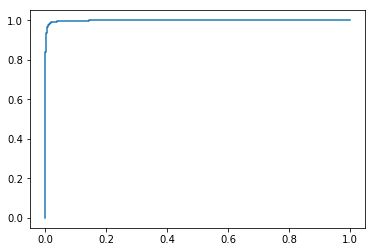

(0.98190476190476195, 0.97115384615384615, 0.99214145383104124)


In [187]:
fpr, tpr, thresholds = metrics.roc_curve(y_true=testy, y_score=ypredprob[:,1], pos_label=1.) # need prob scores for y_scores
plt.plot(fpr, tpr) # ROC curve: fpr vs. tpr
plt.show()

acc, prec, recall = getmetrics(confusion_matrix(testy, ypred))
print(acc, prec, recall)

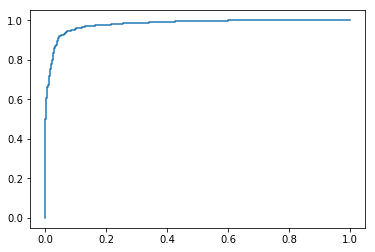

(0.93555555555555558, 0.93012820512820515, 0.93915857605177988)


In [218]:
# h) NMF Log Reg
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
testX = tfidf_transformer2.transform(myVectorizer_df2.transform(comp_test.data + rec_test.data))
testX2_nmf = nmfsvd2.transform(testX)
testy = np.zeros(shape=(1560+1590,))
testy[1560:] = 1
y = np.zeros(shape=(4732,))
y[len(comp_train.filenames):] = 1
clf.fit(Xtf2_nmftrans, y)
ypred = clf.predict(testX2_nmf)
ypredprob = clf.predict_proba(testX2_nmf)
fpr, tpr, thresholds = metrics.roc_curve(y_true=testy, y_score=ypredprob[:,1], pos_label=1.) # need prob scores for y_scores
plt.plot(fpr, tpr) # ROC curve: fpr vs. tpr
plt.show()

acc, prec, recall = getmetrics(confusion_matrix(testy, ypred))
print(acc, prec, recall)

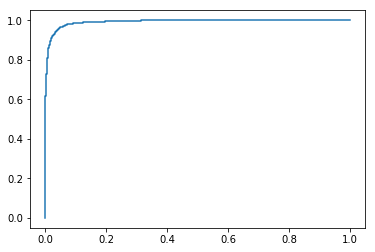

(0.95746031746031746, 0.94999999999999996, 0.96358907672301686)


In [219]:
# i)
# Use L1 - performs better than l2!
clf = LogisticRegression(penalty='l1')
y = np.zeros(shape=(4732,))
y[len(comp_train.filenames):] = 1
clf.fit(Xtf2_nmftrans, y)
ypred = clf.predict(testX2_nmf)
ypredprob = clf.predict_proba(testX2_nmf)
fpr, tpr, thresholds = metrics.roc_curve(y_true=testy, y_score=ypredprob[:,1], pos_label=1.) # need prob scores for y_scores
plt.plot(fpr, tpr) # ROC curve: fpr vs. tpr
plt.show()

acc, prec, recall = getmetrics(confusion_matrix(testy, ypred))
print(acc, prec, recall)

In [221]:
kf = KFold(n_splits=5, shuffle=True)
X = Xtf2_nmftrans
y = np.zeros(shape=(4732,))
y[len(comp_train.filenames):] = 1
modelperformance = {}
for c in range(-3, 4):
    clf = LogisticRegression(C=pow(10, c), penalty='l1')
    totalacc = 0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        totalacc += getmetrics(confusion_matrix(y_test, y_pred))[0]
        
    avgacc = totalacc / 5
    modelperformance[pow(10, c)] = avgacc
        
print modelperformance
# Use C = 100

{1: 0.95815538553929058, 100: 0.97062784223462972, 0.1: 0.6375707419223049, 1000: 0.96893651031073991, 10: 0.96893584056472992, 0.001: 0.49514523442226588, 0.01: 0.49514233218955594}


In [194]:
# i2)
pc_train = fetch_20newsgroups(subset='train', categories=['comp.sys.ibm.pc.hardware'], shuffle=True, random_state=42)
pc_test = fetch_20newsgroups(subset='test', categories=['comp.sys.ibm.pc.hardware'], shuffle=True, random_state=42)
mac_train = fetch_20newsgroups(subset='train', categories=['comp.sys.mac.hardware'], shuffle=True, random_state=42)
mac_test = fetch_20newsgroups(subset='test', categories=['comp.sys.mac.hardware'], shuffle=True, random_state=42)
fs_train = fetch_20newsgroups(subset='train', categories=['misc.forsale'], shuffle=True, random_state=42)
fs_test = fetch_20newsgroups(subset='test', categories=['misc.forsale'], shuffle=True, random_state=42)
jesus_train = fetch_20newsgroups(subset='train', categories=['soc.religion.christian'], shuffle=True, random_state=42)
jesus_test = fetch_20newsgroups(subset='test', categories=['soc.religion.christian'], shuffle=True, random_state=42)

In [222]:
tfidftrans = TfidfTransformer()

X = tfidftrans.fit_transform(myVectorizer_df2.fit_transform(pc_train.data+mac_train.data+fs_train.data+jesus_train.data))

y = np.zeros((len(pc_train.filenames)+len(mac_train.filenames)+len(fs_train.filenames)+len(jesus_train.filenames),))
y[len(pc_train.filenames):] = 1
y[len(pc_train.filenames)+len(mac_train.filenames):] = 2
y[len(pc_train.filenames)+len(mac_train.filenames)+len(fs_train.filenames):] = 3

testX = tfidftrans.transform(myVectorizer_df2.transform(pc_test.data+mac_test.data+fs_test.data+jesus_test.data))

testy = np.zeros((len(pc_test.filenames)+len(mac_test.filenames)+len(fs_test.filenames)+len(jesus_test.filenames),))
y[len(pc_test.filenames):] = 1
y[len(pc_test.filenames)+len(mac_test.filenames):] = 2
y[len(pc_test.filenames)+len(mac_test.filenames)+len(fs_test.filenames):] = 3
                 


In [223]:
clf = MultinomialNB()
# print(X, y)
clf.fit(X, y)
                 
ypred = clf.predict(testX)
print(np.sum((ypred == testy).astype(int)) / len(testy))

0.0760383386581


In [224]:
clf = SVC(kernel='linear')
clf.fit(X, y)
ypred = clf.predict(testX)
print(np.sum((ypred == testy).astype(int)) / len(testy))

clf = LinearSVC()
clf.fit(X, y)
ypred = clf.predict(testX)
print(np.sum((ypred == testy).astype(int)) / len(testy))


0.171884984026
0.164217252396
